# 第6章: 単語ベクトル

単語の意味を実ベクトルで表現する単語ベクトル（単語埋め込み）に関して、以下の処理を行うプログラムを作成せよ。

## 50. 単語ベクトルの読み込みと表示

Google Newsデータセット（約1,000億単語）での[学習済み単語ベクトル](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit?usp=sharing)（300万単語・フレーズ、300次元）をダウンロードし、"United States"の単語ベクトルを表示せよ。ただし、"United States"は内部的には"United_States"と表現されていることに注意せよ。

In [41]:
from gensim.models import KeyedVectors

model = KeyedVectors.load_word2vec_format(
    "GoogleNews-vectors-negative300.bin", binary=True
)
print(model.get_vector("United_States"))

[-3.61328125e-02 -4.83398438e-02  2.35351562e-01  1.74804688e-01
 -1.46484375e-01 -7.42187500e-02 -1.01562500e-01 -7.71484375e-02
  1.09375000e-01 -5.71289062e-02 -1.48437500e-01 -6.00585938e-02
  1.74804688e-01 -7.71484375e-02  2.58789062e-02 -7.66601562e-02
 -3.80859375e-02  1.35742188e-01  3.75976562e-02 -4.19921875e-02
 -3.56445312e-02  5.34667969e-02  3.68118286e-04 -1.66992188e-01
 -1.17187500e-01  1.41601562e-01 -1.69921875e-01 -6.49414062e-02
 -1.66992188e-01  1.00585938e-01  1.15722656e-01 -2.18750000e-01
 -9.86328125e-02 -2.56347656e-02  1.23046875e-01 -3.54003906e-02
 -1.58203125e-01 -1.60156250e-01  2.94189453e-02  8.15429688e-02
  6.88476562e-02  1.87500000e-01  6.49414062e-02  1.15234375e-01
 -2.27050781e-02  3.32031250e-01 -3.27148438e-02  1.77734375e-01
 -2.08007812e-01  4.54101562e-02 -1.23901367e-02  1.19628906e-01
  7.44628906e-03 -9.03320312e-03  1.14257812e-01  1.69921875e-01
 -2.38281250e-01 -2.79541016e-02 -1.21093750e-01  2.47802734e-02
  7.71484375e-02 -2.81982

## 51. 単語の類似度

"United States"と"U.S."のコサイン類似度を計算せよ。

In [2]:
model.similarity("United_States", "U.S.")

0.73107743

## 52. 類似度の高い単語10件

"United States"とコサイン類似度が高い10語と、その類似度を出力せよ。

In [3]:
model.most_similar("United_States", topn=10)

[('Unites_States', 0.7877248525619507),
 ('Untied_States', 0.7541370987892151),
 ('United_Sates', 0.7400724291801453),
 ('U.S.', 0.7310774326324463),
 ('theUnited_States', 0.6404393911361694),
 ('America', 0.6178410053253174),
 ('UnitedStates', 0.6167312264442444),
 ('Europe', 0.6132988929748535),
 ('countries', 0.6044804453849792),
 ('Canada', 0.601906955242157)]

## 53. 加法構成性によるアナロジー

"Spain"の単語ベクトルから"Madrid"のベクトルを引き、"Athens"のベクトルを足したベクトルを計算し、そのベクトルと類似度の高い10語とその類似度を出力せよ。

In [4]:
model.most_similar(positive=["Spain", "Athens"], negative=["Madrid"], topn=10)

[('Greece', 0.6898480653762817),
 ('Aristeidis_Grigoriadis', 0.560684859752655),
 ('Ioannis_Drymonakos', 0.5552908778190613),
 ('Greeks', 0.545068621635437),
 ('Ioannis_Christou', 0.5400862097740173),
 ('Hrysopiyi_Devetzi', 0.5248445272445679),
 ('Heraklio', 0.5207759737968445),
 ('Athens_Greece', 0.516880989074707),
 ('Lithuania', 0.5166865587234497),
 ('Iraklion', 0.5146791338920593)]

## 54. アナロジーデータでの実験

[単語アナロジーの評価データ](http://download.tensorflow.org/data/questions-words.txt)をダウンロードし、国と首都に関する事例（`: capital-common-countries`セクション）に対して、vec(2列目の単語) - vec(1列目の単語) + vec(3列目の単語)を計算し、そのベクトルと類似度が最も高い単語と、その類似度を求めよ。求めた単語と類似度は、各事例と一緒に記録せよ。

In [5]:
# !wget http://download.tensorflow.org/data/questions-words.txt

--2025-04-19 23:47:38--  http://download.tensorflow.org/data/questions-words.txt
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.207.123, 142.250.76.155, 172.217.161.251, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.207.123|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt.1’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.03s   

2025-04-19 23:47:38 (16.5 MB/s) - ‘questions-words.txt.1’ saved [603955/603955]



In [21]:
"""
--- questions-words.txtの説明 ---

：で始まる行はセクションを表す(例 「: capital-common-countries」、「: gram1-adjective-to-adverb」など)
セクション名が「gram」で始まる問題は文法的アナロジー(単語の語形変化や文法的関係を問う問題)を表し、それ以外は意味的アナロジー(単語間の意味的関係を問う問題)を表す。

4つの単語がスペースで区切られた行はアナロジー問題を表す(例 ---> Athens Greece Baghdad Iraq)
１列目：基準となる単語
２列目：１列目の単語に対応する単語
３列目：別の基準単語
４列目：３列目の単語に対応する正解単語

"""

"""
問題文には`: capital-common-countries`セクションに対して行えとあるが、このセクションは意味的アナロジーの問題である。次の問題55で意味的アナロジーの正解率だけでなく
文法的アナロジーの正解率も計算できるように、全てのセクションについて処理を行うことにする。なお、実行には時間がかかる。
"""


import pandas as pd
import tqdm

with open("questions-words.txt", "r") as f1, open("output_54.txt", "w") as f2:
    lines = f1.readlines()
    for line in tqdm.tqdm(lines):
        if line[0] == ":":
            section = line[2:].replace("\n", "")
            continue
        word_1, word_2, word_3, word_4 = line.replace("\n", "").split(" ")
        answer, similarity = model.most_similar(
            positive=[word_2, word_3], negative=word_1, topn=1
        )[0]
        f2.write(
            f"{section} {word_1} {word_2} {word_3} {word_4} {answer} {similarity}\n"
        )

100%|██████████| 19558/19558 [35:00<00:00,  9.31it/s]


## 55. アナロジータスクでの正解率

54の実行結果を用い、意味的アナロジー（semantic analogy）と文法的アナロジー（syntactic analogy）の正解率を測定せよ。

In [22]:
df = pd.read_csv("output_54.txt", header=None, sep=" ")

sem = df[~df[0].str.contains("gram")]
syn = df[df[0].str.contains("gram")]
print("意味的アナロジー正解率：", (sem[4] == sem[5]).sum() / len(sem))
print("文法的アナロジー正解率：", (syn[4] == syn[5]).sum() / len(syn))

意味的アナロジー正解率： 0.7308602999210734
文法的アナロジー正解率： 0.7400468384074942


## 56. WordSimilarity-353での評価

[The WordSimilarity-353 Test Collection](http://www.gabrilovich.com/resources/data/wordsim353/wordsim353.html)の評価データをダウンロードし、単語ベクトルにより計算される類似度のランキングと、人間の類似度判定のランキングの間のスピアマン相関係数を計算せよ。

In [23]:
# !wget https://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
# !unzip wordsim353.zip

--2025-04-20 01:46:35--  https://www.gabrilovich.com/resources/data/wordsim353/wordsim353.zip
Resolving www.gabrilovich.com (www.gabrilovich.com)... 173.236.137.139
Connecting to www.gabrilovich.com (www.gabrilovich.com)|173.236.137.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23257 (23K) [application/zip]
Saving to: ‘wordsim353.zip’

wordsim353.zip      100%[===================>]  22.71K   138KB/s    in 0.2s    

2025-04-20 01:46:36 (138 KB/s) - ‘wordsim353.zip’ saved [23257/23257]

Archive:  wordsim353.zip
  inflating: combined.csv            
  inflating: set1.csv                
  inflating: set2.csv                
  inflating: combined.tab            
  inflating: set1.tab                
  inflating: set2.tab                
  inflating: instructions.txt        


In [24]:
from scipy.stats import spearmanr

df = pd.read_csv("combined.csv")
words_1 = df["Word 1"]
words_2 = df["Word 2"]
human_scores = df["Human (mean)"]

similarity_scores = []
for word_1, word_2 in zip(words_1, words_2):
    similarity = model.similarity(word_1, word_2)
    similarity_scores.append(similarity)

corr, _ = spearmanr(similarity_scores, human_scores)
print(corr)

0.7000166486272194


## 57. k-meansクラスタリング

国名に関する単語ベクトルを抽出し、k-meansクラスタリングをクラスタ数k=5として実行せよ。

In [142]:
from sklearn.cluster import KMeans

# 国名のファイル(https://gist.github.com/kalinchernev/486393efcca01623b18d)
with open("countries.txt", "r") as f:
    vectors = []
    countries = []
    for country in f.readlines():
        country = country.replace("\n", "").replace(" ", "_")
        if country in model.key_to_index:
            countries.append(country)
            vector = model.get_vector(country)
            vectors.append(vector)

km = KMeans(n_clusters=5, random_state=0)
km.fit_predict(vectors)  # クラスタリング

result = {i: [] for i in range(5)}
for country, label in zip(countries, km.labels_):
    result[label].append(country)

for k, v in result.items():
    print(f"\n--- ラベル：{k}   数：{len(v)} ---")
    for country in v:
        print(country)


--- ラベル：0   数：41 ---
Algeria
Angola
Benin
Botswana
Burkina
Burundi
Cameroon
Comoros
Congo
Djibouti
Equatorial_Guinea
Eritrea
Ethiopia
Gabon
Gambia
Ghana
Guinea
Ivory_Coast
Kenya
Lesotho
Liberia
Madagascar
Malawi
Mali
Mauritania
Mozambique
Namibia
Niger
Nigeria
Rwanda
Senegal
Sierra_Leone
Somalia
Sudan
Swaziland
Tanzania
Togo
Tunisia
Uganda
Zambia
Zimbabwe

--- ラベル：1   数：33 ---
Albania
Andorra
Armenia
Azerbaijan
Belarus
Bosnia_Herzegovina
Bulgaria
Croatia
Cyprus
Czech_Republic
Estonia
Georgia
Greece
Hungary
Kazakhstan
Kosovo
Latvia
Liechtenstein
Lithuania
Macedonia
Malta
Moldova
Montenegro
Poland
Romania
San_Marino
Serbia
Slovakia
Slovenia
Turkey
Turkmenistan
Ukraine
Uzbekistan

--- ラベル：2   数：35 ---
Argentina
Australia
Austria
Belgium
Brazil
Canada
Chad
Chile
Costa_Rica
Denmark
Finland
France
Germany
Iceland
Italy
Japan
Jordan
Luxembourg
Mexico
Monaco
Morocco
Netherlands
New_Zealand
Norway
Paraguay
Portugal
Qatar
South_Africa
Spain
Sweden
Switzerland
United_Arab_Emirates
United_Kingdom

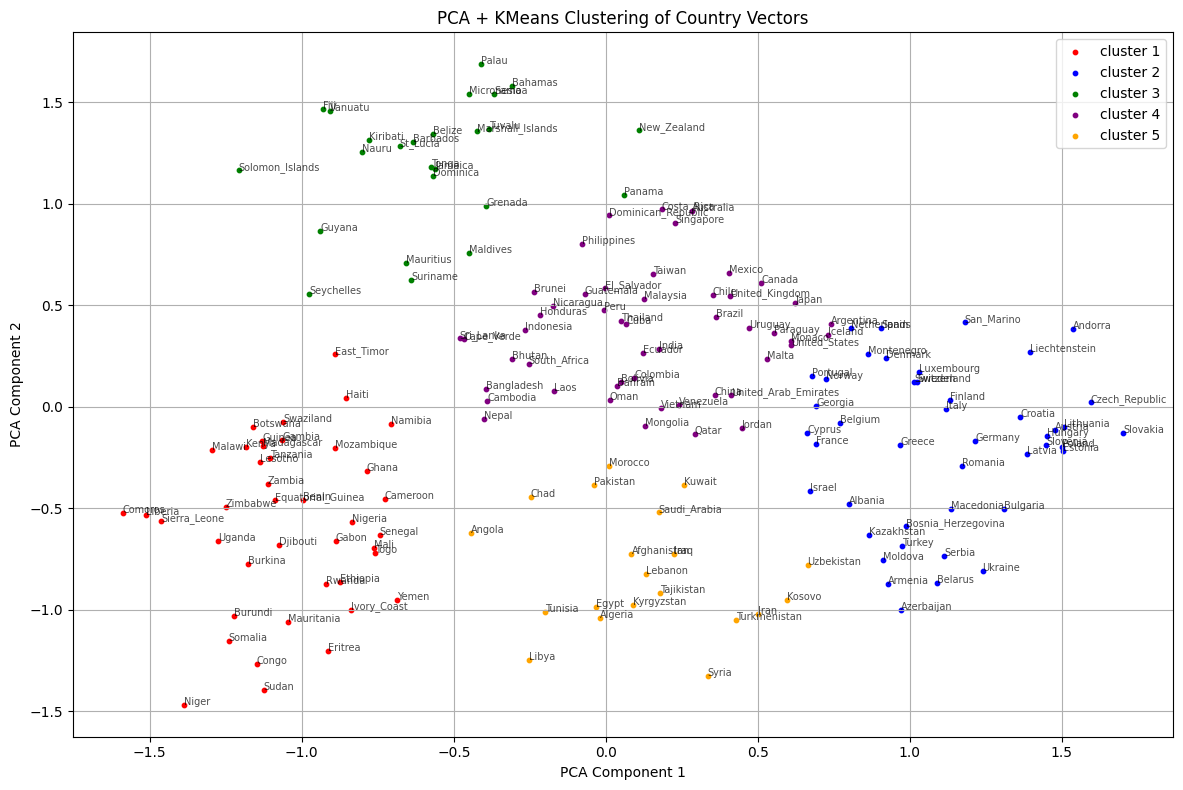

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

vectors = []
countries = []

with open("countries.txt", "r") as f:
    for country in f:
        country = country.strip().replace(" ", "_")
        if country in model.key_to_index:
            countries.append(country)
            vectors.append(model.get_vector(country))


# DataFrame化 
df = pd.DataFrame(vectors, index=countries)

# PCA適用 
pca = PCA(n_components=2)
pcs2 = pca.fit_transform(df)  # 第1, 第2主成分のみ

# クラスタリング 
km = KMeans(n_clusters=5, random_state=0)
cluster = km.fit_predict(pcs2)

# 可視化 
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'purple', 'orange']

for i in range(5):
    plt.scatter(pcs2[cluster == i, 0], pcs2[cluster == i, 1], s=10, color=colors[i], label=f"cluster {i+1}")

# 国名を重ねる
for i, name in enumerate(countries):
    plt.text(pcs2[i, 0], pcs2[i, 1], name, fontsize=7, alpha=0.7)

plt.title("PCA + KMeans Clustering of Country Vectors")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


## 58. Ward法によるクラスタリング

国名に関する単語ベクトルに対し、Ward法による階層型クラスタリングを実行せよ。さらに、クラスタリング結果をデンドログラムとして可視化せよ。

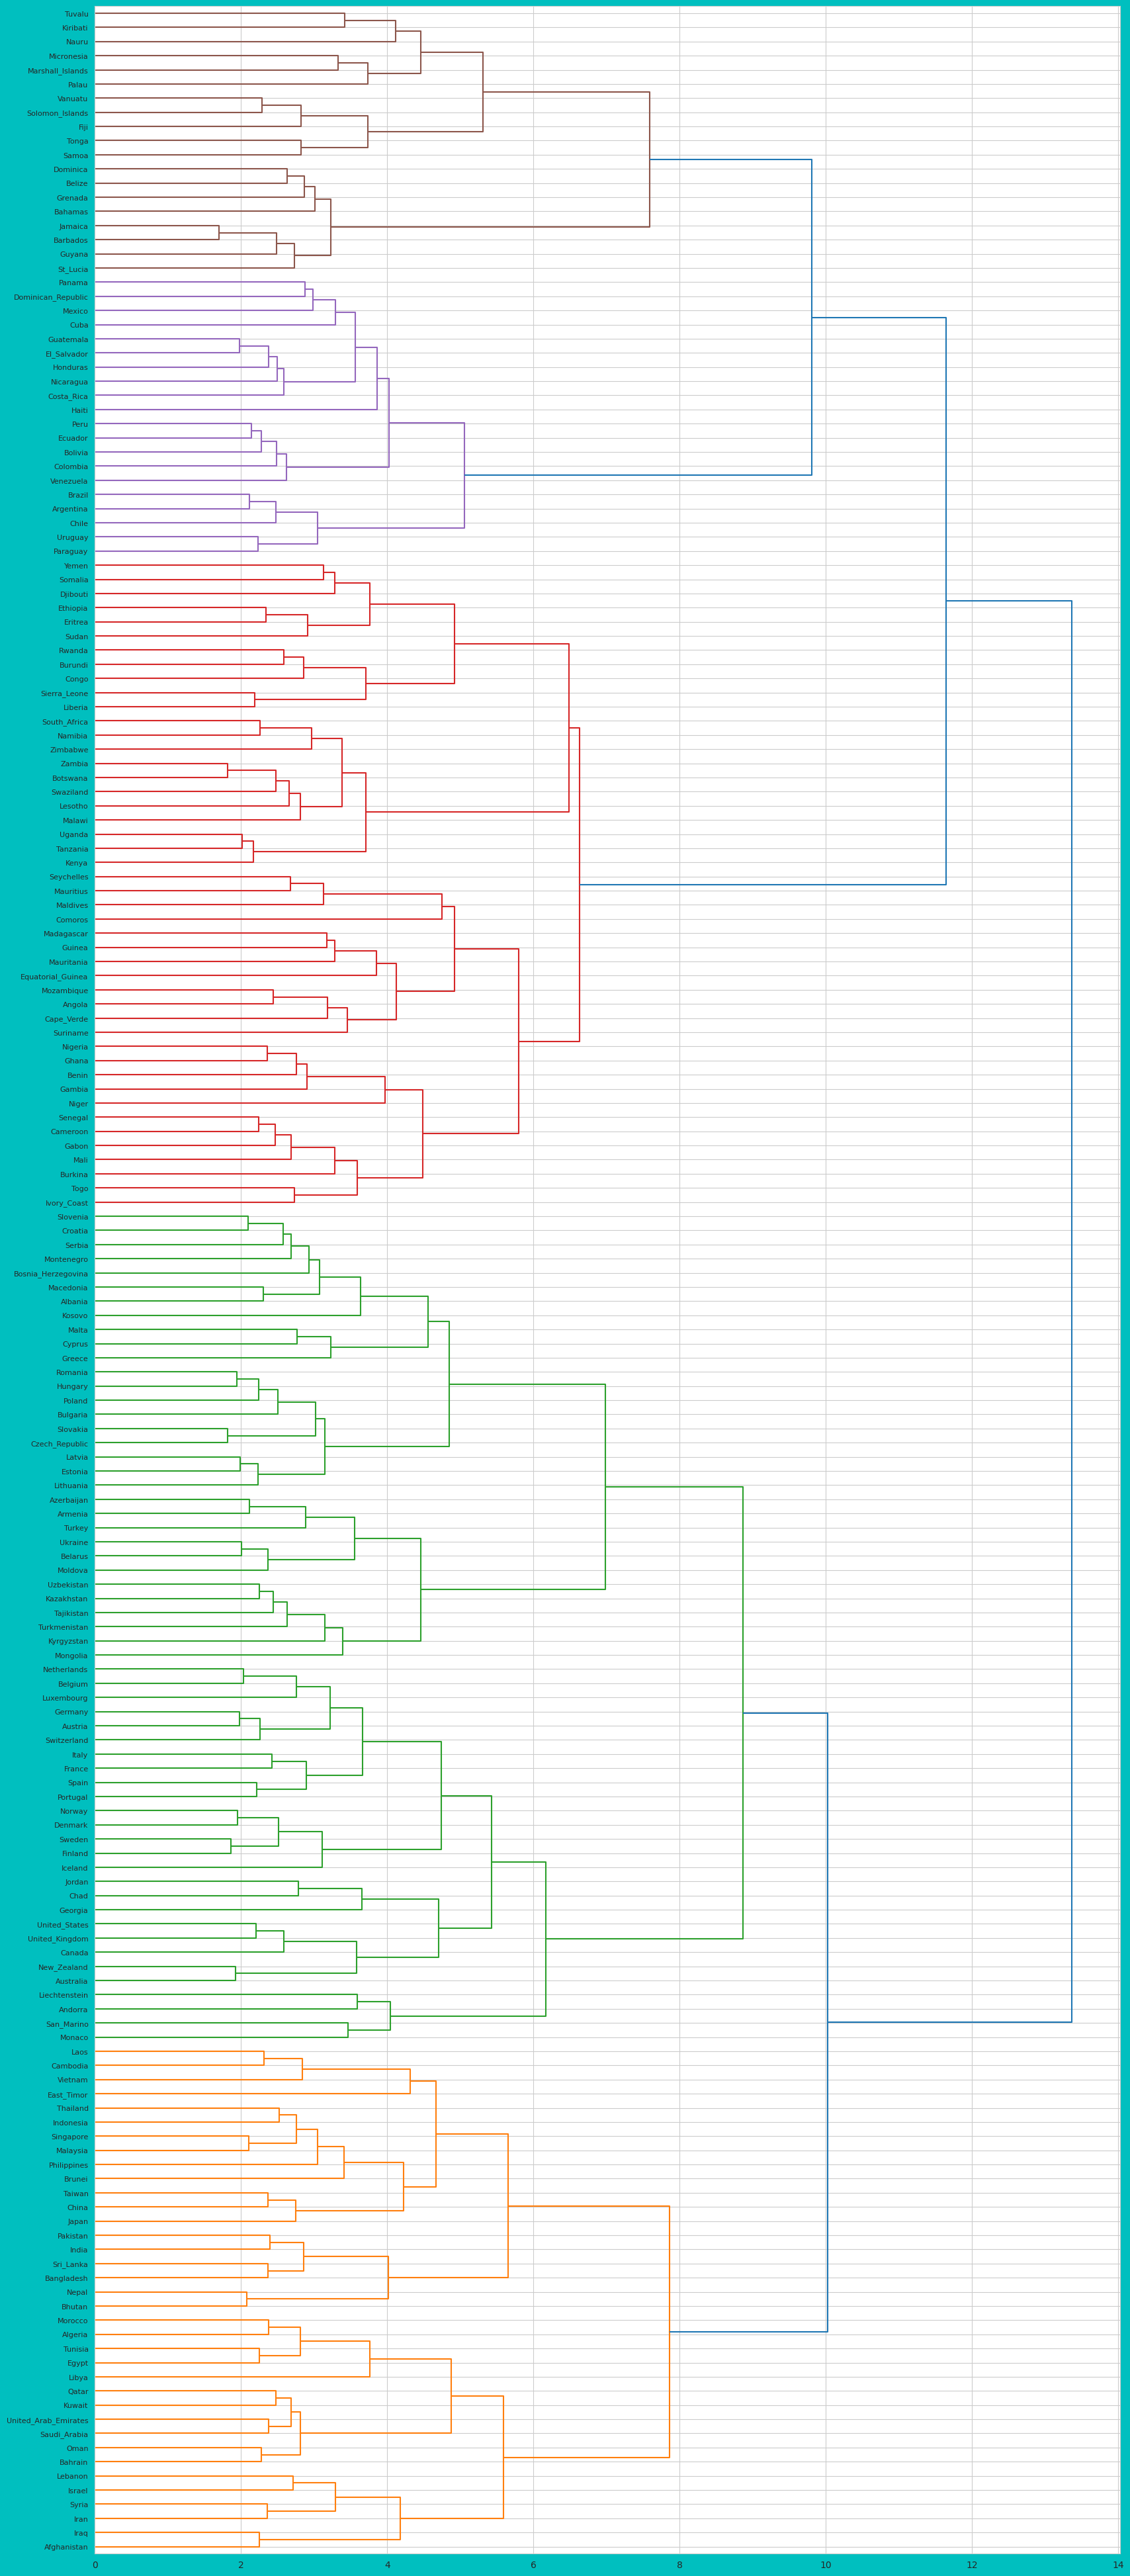

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

vectors = []
countries = []

with open("countries.txt", "r") as f:
    for country in f:
        country = country.strip().replace(" ", "_")
        if country in model.key_to_index:
            countries.append(country)
            vectors.append(model.get_vector(country))

clustered = linkage(vectors, method='ward')

plt.figure(figsize=(20, 50), dpi=100, facecolor='c')
_ = dendrogram(clustered, labels=countries, leaf_font_size=8, orientation='right')
plt.show()


## 59. t-SNEによる可視化

ベクトル空間上の国名に関する単語ベクトルをt-SNEで可視化せよ。

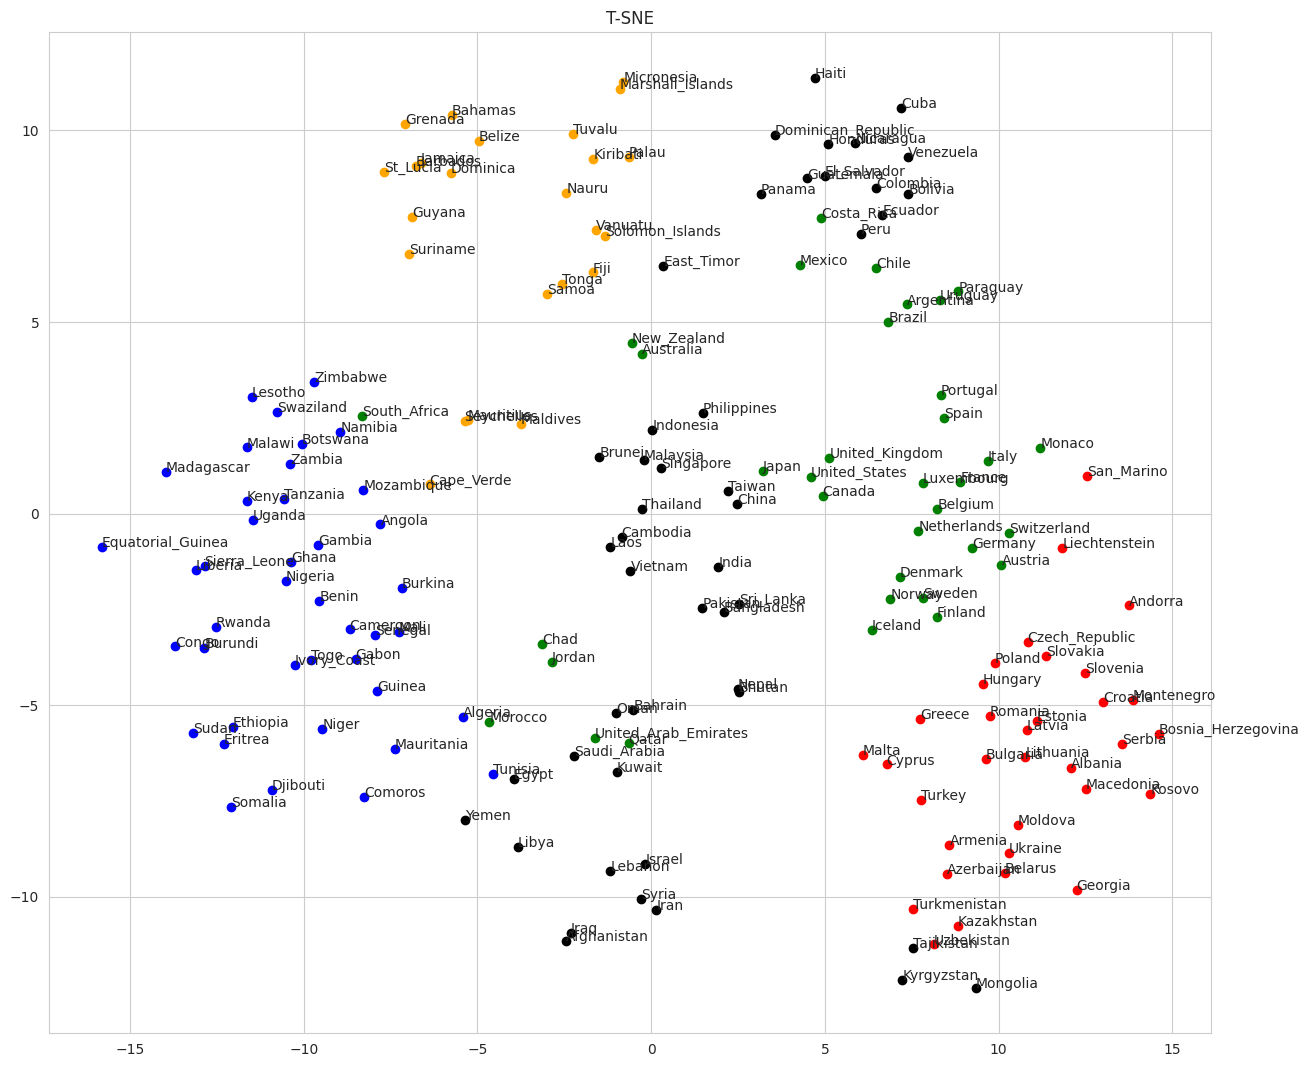

In [ ]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

vectors = []
countries = []

with open("countries.txt", "r") as f:
    for country in f:
        country = country.strip().replace(" ", "_")
        if country in model.key_to_index:
            countries.append(country)
            vectors.append(model.get_vector(country))
            
df = pd.DataFrame(vectors, index=countries)

pred = KMeans(n_clusters = 5, random_state=0).fit_predict(df)

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df)

plt.figure(figsize=(15, 13))
col_list = ["Blue", "Red", "Green", "Black","Orange"]
for X, name, km in zip(X_tsne, countries, pred):
    plt.plot(X[0], X[1], color = col_list[km], marker="o")
    plt.annotate(name, xy=(X[0], X[1]))
plt.title("T-SNE")
plt.show()

